# Evolution of COVID-19
> Data from John Hopkins University

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]

In [0]:
#hide
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
plt.style.use('seaborn')
import datetime
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
#hide
pip install countryinfo

     |████████████████████████████████| 204kB 3.4MB/s 
  Created wheel for countryinfo: filename=countryinfo-0.1.0-cp36-none-any.whl size=592040 sha256=86ec12f920d18f15653d0f7ddaa092e4c05b00e28815bea9bae7f6d0e7d304e5
  Stored in directory: /root/.cache/pip/wheels/78/59/c4/93bb8e79dcbf95375817c1ecf4c1573bd0c17e9376e2052f95
Successfully built countryinfo


In [3]:
#hide
from countryinfo import CountryInfo
#country = CountryInfo('United States')
#CountryInfo('United States').population()
CountryInfo('Czech Republic').population()

10521600

In [4]:
#hide
CountryInfo('Portugal').population()

10477800

In [5]:
#hide
CountryInfo('Czech Republic').population()
CountryInfo('Portugal').population()

10477800

In [0]:
#hide
def display_all(df,Nrows=5,Ncolumns=1000):
    # função para não cortar colunas ao visualizar    
    import pandas as pd
    from IPython.display import display
    with pd.option_context("display.max_rows", Nrows): 
        with pd.option_context("display.max_columns", Ncolumns): 
            display(df)




def format_graph(size_title, title, subtitle, ax, graph_type = 1):

  # Texto
  ax.text(0, 1.15, title,
          transform=ax.transAxes, size=size_title, weight=600, ha='left', va='top')    
  ax.text(0, 1.06, subtitle, transform=ax.transAxes, size=size_title-5, color='#777777')
  ax.text(0.7, 0.05, 'Vasco Mano; Source: John Hopkins', transform=ax.transAxes,
          color='#777777', size=size_title-8, ha='left', va='bottom' ,bbox=dict(facecolor='white', alpha=1.0, edgecolor='white'))  

  # formating
  from matplotlib.ticker import FormatStrFormatter
  ax.xaxis.set_ticks_position('top')
  ax.tick_params(axis='x', colors='#777777', labelsize = size_title-8)

  ax.tick_params(axis="y", labelsize = size_title-8)

  if ((graph_type == 3) or (graph_type == 4)):
    if (graph_type == 4): ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_ylabel('Log scale', fontsize=size_title-8)
    ax.set_yscale('log')
  else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))    

  ax.grid(which='both', axis='x', linestyle='-')
  ax.grid(color='#777777', linestyle=(0, (5, 5)), linewidth=0.3)
  ax.grid(True)
  ax.margins(0, 0.01)
  plt.box(False)

  #plt.legend(loc=2, prop={'size': size_title-8}, frameon=False)
  return

In [7]:
#hide
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
#hide
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

it = 2

if it == 1:
  df = df_confirmed
elif it == 2:
  df = df_death
else:
  df = 0
  print('ERRO!!')

df = df.drop(columns=['Lat', 'Long'])
df_group = df.groupby(['Country/Region']).sum()

df_group['Region'] = [''] * df_group.shape[0]
df_group['Flag'] = [''] * df_group.shape[0]
df_group = df_group.reset_index()

#df_group.head(2)

for i in range(df_group.shape[0]):
  if (df_group['Country/Region'].loc[i] == 'Czechia'): df_group['Country/Region'].loc[i] = 'Czech Republic'
  if (df_group['Country/Region'].loc[i] == 'Korea, South'): df_group['Country/Region'].loc[i] = 'South Korea'
  if (df_group['Country/Region'].loc[i] == 'North Macedonia'): df_group['Country/Region'].loc[i] = 'Macedonia'
  if (df_group['Country/Region'].loc[i] == 'Taiwan*'): df_group['Country/Region'].loc[i] = 'Taiwan'
  if (df_group['Country/Region'].loc[i] == 'US'): df_group['Country/Region'].loc[i] = 'United States'

# ---------------------------------------------------------------------  
    
  if ((df_group['Country/Region'].loc[i] != 'Andorra') 
  and (df_group['Country/Region'].loc[i] != 'Bahamas') 
  and (df_group['Country/Region'].loc[i] != 'Burma') 
  and (df_group['Country/Region'].loc[i] != 'Cabo Verde') 
  and (df_group['Country/Region'].loc[i] != 'Congo (Brazzaville)')
  and (df_group['Country/Region'].loc[i] != 'Congo (Kinshasa)')
  and (df_group['Country/Region'].loc[i] != "Cote d'Ivoire")
  and (df_group['Country/Region'].loc[i] != "Diamond Princess")
  and (df_group['Country/Region'].loc[i] != "Eswatini")
  and (df_group['Country/Region'].loc[i] != "Gambia")
  and (df_group['Country/Region'].loc[i] != "Holy See")
  and (df_group['Country/Region'].loc[i] != "Kosovo")
  and (df_group['Country/Region'].loc[i] != "MS Zaandam")
  and (df_group['Country/Region'].loc[i] != "Montenegro")
  and (df_group['Country/Region'].loc[i] != "Macedonia")
  and (df_group['Country/Region'].loc[i] != "Sao Tome and Principe")
  and (df_group['Country/Region'].loc[i] != "Serbia")
  and (df_group['Country/Region'].loc[i] != "Timor-Leste")
  and (df_group['Country/Region'].loc[i] != "West Bank and Gaza")):

# ---------------------------------------------------------------------
 
    #print(f'i = {i}    df_group[Country/Region].loc[i] = {df_group["Country/Region"].loc[i]}')
    df_group['Region'][i] = CountryInfo(df_group['Country/Region'].loc[i]).region()
    df_group['Flag'][i] = 'https://www.countryflags.io/' + CountryInfo(df_group['Country/Region'].loc[i]).iso()['alpha2'] + '/flat/64.png'

if it == 1:
  df_group.to_csv('drive/My Drive/Colab Notebooks/Covid19/df_confirmed_group.csv', index=False)
elif it == 2:
  df_group.to_csv('drive/My Drive/Colab Notebooks/Covid19/df_death_group.csv', index=False)
else:
  print('ERRO!')

df_group.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,Region,Flag
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,Asia,https://www.countryflags.io/AF/flat/64.png
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,Europe,https://www.countryflags.io/AL/flat/64.png
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,Africa,https://www.countryflags.io/DZ/flat/64.png
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,,
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,Africa,https://www.countryflags.io/AO/flat/64.png


In [0]:
#hide

#display_all(df_group.head,1000)

#df_group['Flag'][46]


In [9]:
#hide
#help(CountryInfo)

CountryInfo('United States').iso()['alpha2']

'US'

In [0]:
#hide
def data_covid(case, graph_type):
  # Data
  if case == 1: 
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    DAY_ZERO = 100
    title = 'Number of confirmed cases of COVID-19'
    miny = 100
  if case == 2: 
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

    DAY_ZERO = 10
    title = 'Number of deaths caused by COVID-19'
    miny = 10
  if case == 3: 
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    title = 'Number of people that recovered from COVID-19'
    DAY0 = False
    miny = 1
  if case == 4: 
    df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    DAY_ZERO = 100
    title = 'Number of new confirmed cases of COVID-19'
    miny = 100    

  if graph_type == 2 or graph_type == 4: title = title + ' per 100 000 population'

  return df, title, DAY_ZERO


In [0]:
#hide
def day_zero(df,country,N0):

  cols = df.keys()
  cols = df.loc[country, cols[3]:cols[-1]].keys()

  flag = 0
  day_0 = 0
  for xi in range(len(cols)):
    if df[cols[xi]][country] > flag: 
      flag = df[cols[xi]][country]
    if flag >= N0: 
      day_0 = xi+1
      break
    else:
      continue
  return day_0

In [0]:
#hide
def plot_country(country, ax, day=1, case=1, graph_type=1, LINE_WIDTH=3, MARKERZISE=24, LINESTYLE='solid', color='black', DAY0=True, DAY_LABEL=2, maxy = 60000):
  '''
  case 1: confirmed
  case 2: death
  case 3: recoveries
  case 4: new cases

  graph_type 1: linear
  graph_type 2: per 100 000 habitantes
  graph_type 3: log scale
  graph_type 4: log scale per 100 000 habitantes
  '''

  if ((case !=1) and (case !=2) and (case !=3) and (case !=4)): 
    print('Error: Case number')
    return
  if ((graph_type !=1) and (graph_type !=2) and (graph_type !=3) and (graph_type !=4)): 
    print('Error: graph_type number')
    return
  if case == 4:
    if ((graph_type !=1) and (graph_type !=2)): print('Error: graph_type number')


  import matplotlib.dates as mdates
  from dateutil import rrule, parser
  from matplotlib.ticker import FormatStrFormatter
  size_title = 24
  
  # data
  df, title, DAY_ZERO = data_covid(case, graph_type)
  df_group = df.groupby(['Country/Region']).sum()
  if DAY0: day0 = day_zero(df_group,country,DAY_ZERO)

  cols = df.keys()
  datemax = cols[-1]
  datemax = datetime.datetime.strptime(datemax, '%m/%d/%y').strftime('%d/%m/%y')
  subtitle = f'Date: {datemax}'

  if country != 'US' and country != 'Czechia':
    NPeopleAPI = CountryInfo(country)
    NPeople = NPeopleAPI.population()
  elif country == 'US':
    NPeopleAPI = CountryInfo('United States')
    NPeople = NPeopleAPI.population()
  elif country == 'Czechia':
    NPeopleAPI = CountryInfo('Czech Republic')
    NPeople = NPeopleAPI.population()

  # Dates
  cols = df.keys()
  df_dates = df.loc[:, cols[4]:cols[-1]]
  df_dates = df_dates.keys()
  datemin = df_dates[0]
  datemax = df_dates[day]
  mydates = list(rrule.rrule(rrule.DAILY,
                             dtstart=parser.parse(datemin),
                             until=parser.parse(datemax)))
  
  if day > df_group.loc[country][day0+2:].size: day = df_group.loc[country][day0+2:].size
  mydates_day0 = np.arange(day)

  # Pre Processing  
  y = []
  for i in range(len(mydates_day0)):
    if ((graph_type==2) or (graph_type==4)):
      x = df_group.loc[country][day0+2+i]/float(NPeople)
      x = x*100000
    else:
      x = df_group.loc[country][day0+2+i]
    y.append(x)
  if case == 4:
    y = []
    for i in range(len(mydates_day0)):
      x = df_group.loc[country][day0+2+i]-df_group.loc[country][day0+2+i-1]
      if (graph_type==2): x = 100000*x/float(NPeople)
      y.append(x) 

  # Plot
  ax.plot(mydates_day0, y, linewidth=LINE_WIDTH, markersize=MARKERZISE, linestyle = LINESTYLE, color=color, label= f'{country}')

  # Format
  format_graph(size_title, title, subtitle, ax, graph_type)
  ax.set_facecolor('white')
  fig.patch.set_facecolor('white')

  return

In [0]:
#hide
def plot_slope(ax, graph_type, SLOPE=2, LINE_WIDTH=1, MARKERZISE=24, LINESTYLE='dashed', COLOR='grey', N0=100):
  NDAY = 100
  X = [0 , NDAY]
  Y = [N0 , N0*SLOPE**(NDAY)]
  #print(f'N0 = {N0}')
  #print(f'N0*SLOPE^(NDAY) = {N0*SLOPE**(NDAY)}')
  ax.plot(X, Y, linewidth=LINE_WIDTH, markersize=MARKERZISE, linestyle = LINESTYLE, color=COLOR)

  if ((graph_type == 3) or (graph_type == 4)): ax.set_yscale('log')
  return


def plot_4slopes(ax, case=1, GRAPH_TYPE=1):
  if case != 4:
    if case == 1: 
      text = 'Cases'
      N0=100
    elif case == 2: 
      text = 'Deaths'
      N0=10

    #if GRAPH_TYPE==1 or GRAPH_TYPE==3:
    if GRAPH_TYPE==3:
      ax.text(0.165, 0.92, text + " double\nevery day", transform=ax.transAxes, size=24-5, color='#777777')
      plot_slope(ax, GRAPH_TYPE, SLOPE=2, N0=N0)       # duplica diariamente
      ax.text(0.40, 0.90, "every 2 days", transform=ax.transAxes, size=24-5, color='#777777')
      plot_slope(ax, GRAPH_TYPE, SLOPE=(1.5), N0=N0)   # duplica 2 dias
      ax.text(0.60, 0.88, "every 3 days", transform=ax.transAxes, size=24-5, color='#777777')
      plot_slope(ax, GRAPH_TYPE, SLOPE=(1.334), N0=N0) # duplica 3 dias
      ax.text(0.85, 0.73, "every 5 days", transform=ax.transAxes, size=24-5, color='#777777')
      plot_slope(ax, GRAPH_TYPE, SLOPE= 1.2, N0=N0)    # duplica 5 dias
   
  return

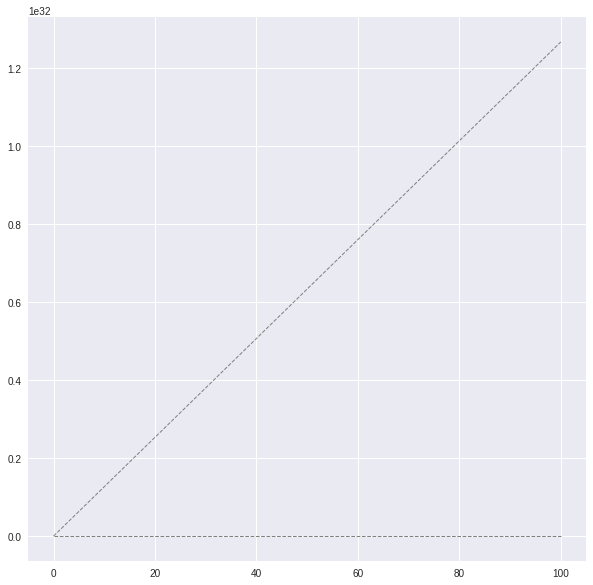

In [14]:
#hide
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_slope(ax, 1, SLOPE=2)
plot_slope(ax, 1, SLOPE=1.5)

In [0]:
#hide
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#confirmed_df['3/18/20'][59] = 642
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

cols = confirmed_df.keys()

Last update:

In [16]:
#hide_input
lastdate = cols[-1]
lastdate = datetime.datetime.strptime(lastdate, '%m/%d/%y').strftime('%d/%m/%y')
print(lastdate)

19/04/20


In [0]:
#hide
cols = confirmed_df.keys()

confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


# Number of confirmed cases and deaths worldwide


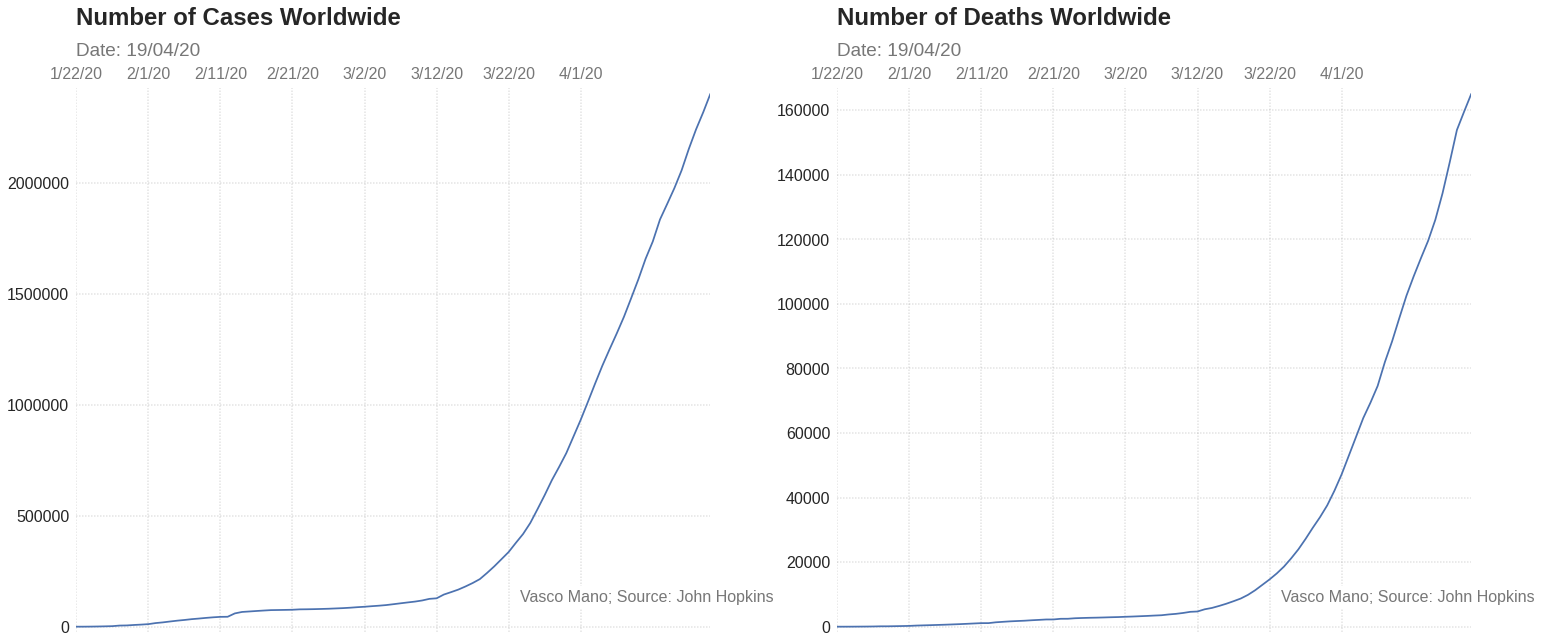

In [18]:
#hide_input
subtitle = str(f'Date: {lastdate}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

# ----------
ax1.plot(dates,world_cases)
format_graph(24, 'Number of Cases Worldwide', subtitle, ax1)
ax1.set_xticks(np.arange(0, 80, step=10));  # Set label locations.
ax1.set_facecolor('white')
fig.patch.set_facecolor('white')

# ----------
ax2.plot(dates,total_deaths)
format_graph(24, 'Number of Deaths Worldwide', subtitle, ax2)
ax2.set_xticks(np.arange(0, 80, step=10));  # Set label locations.
ax2.set_facecolor('white')
fig.patch.set_facecolor('white')

#plt.tight_layout()

# Selected Countries

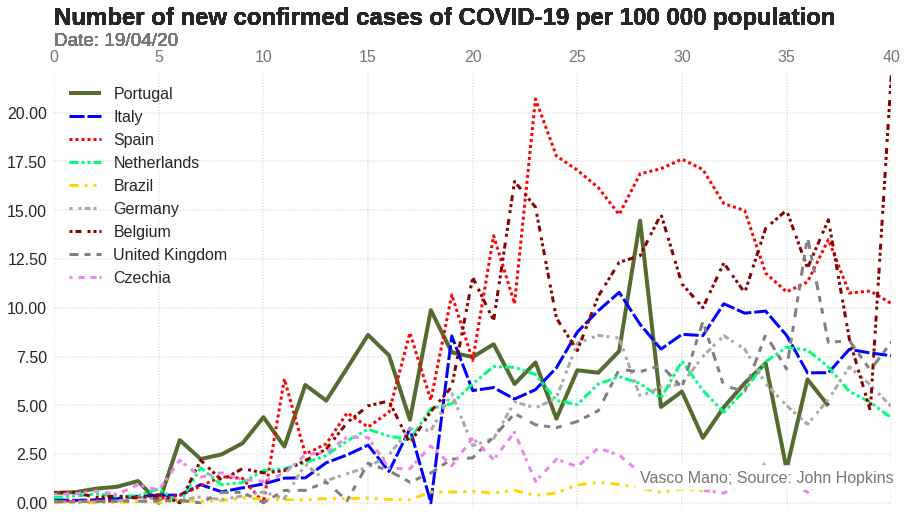

In [19]:
#hide
def frames(NDAYS, ax, CASE=1, graph_type=1):
  '''
  case 1: confirmed
  case 2: death
  case 3: recoveries

  graph_type 1: linear
  graph_type 2: per 100 000 habitantes
  graph_type 3: log scale
  graph_type 4: log scale per 100 000 habitantes
  '''
  import matplotlib.ticker as ticker
  size_title = 24

  #ax.clear()
  plot_country(       'Portugal', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=4, MARKERZISE=24, color='darkolivegreen', LINESTYLE=(0, ())                , DAY0=True)
  plot_country(          'Italy', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='blue'          , LINESTYLE=(0, (5, 1))            , DAY0=True)
  plot_country(          'Spain', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='red'           , LINESTYLE=(0, (1, 1))            , DAY0=True)
  plot_country(    'Netherlands', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='springgreen'   , LINESTYLE=(0, (3, 1, 1, 1, 1, 1)), DAY0=True)
  if CASE != 4: plot_country(             'US', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='black'         , LINESTYLE=(0, (3, 5, 1, 5, 1, 5)), DAY0=True)
  plot_country(         'Brazil', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='gold'          , LINESTYLE=(0, (3, 2, 1, 2, 1, 2)), DAY0=True)
  plot_country(        'Germany', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='darkgray'      , LINESTYLE=(0, (1, 2, 1, 1, 2, 1)), DAY0=True)
  plot_country(        'Belgium', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='darkred'       , LINESTYLE=(0, (1, 1, 2, 2, 1, 1)), DAY0=True)
  plot_country( 'United Kingdom', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='gray'          , LINESTYLE=(0, (3, 2, 2, 2, 2, 3)), DAY0=True)
  plot_country(        'Czechia', ax, day=NDAYS, case=CASE, graph_type=graph_type, LINE_WIDTH=3, MARKERZISE=24, color='violet'          , LINESTYLE=(0, (1, 2, 2, 2, 2, 1)), DAY0=True)
  

  plot_4slopes(ax, case=CASE, GRAPH_TYPE=graph_type)

  from matplotlib.ticker import FormatStrFormatter
  if (graph_type == 4):
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  else:
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

  ax.legend(loc=2, prop={'size': size_title-8}, frameon=False)

  ax.set_xlim(0,   40)
  miny = 0
  if (graph_type == 3): 
    miny = 10
    if CASE == 1: miny = 100
  if (graph_type == 4): 
    miny = 0.01

  if CASE == 1:
    if graph_type == 2 or graph_type == 4:
      ax.set_ylim(miny, 400)
    else:
      ax.set_ylim(miny, 200000)
  elif CASE == 2:
    if graph_type == 2 or graph_type == 4:
      ax.set_ylim(miny, 40)
    else:
      ax.set_ylim(miny,20000)
  elif CASE == 4:    
    if graph_type == 2: ax.yaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  #plt.show()

# --------

fig, ax = plt.subplots( 1, 1, figsize=(15, 8))
frames(50, ax, CASE=4, graph_type=2)

## Number of confirmed cases and deaths

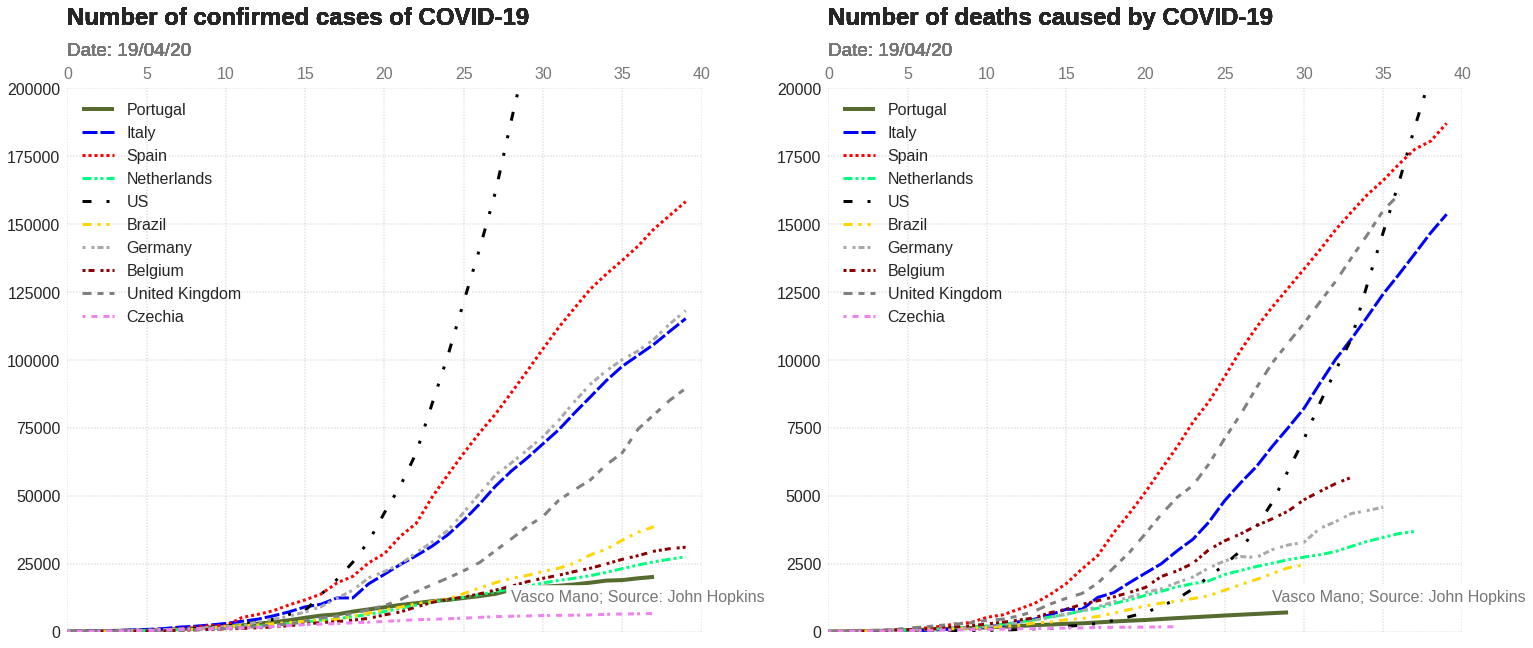

In [20]:
#hide_input
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

#plt.subplot(1, 2, 1)
frames(40, ax1, CASE=1, graph_type=1)

#plt.subplot(1, 2, 2)
frames(40, ax2, CASE=2, graph_type=1)

#plt.tight_layout()

## Number of confirmed cases and deaths per 100 000 population

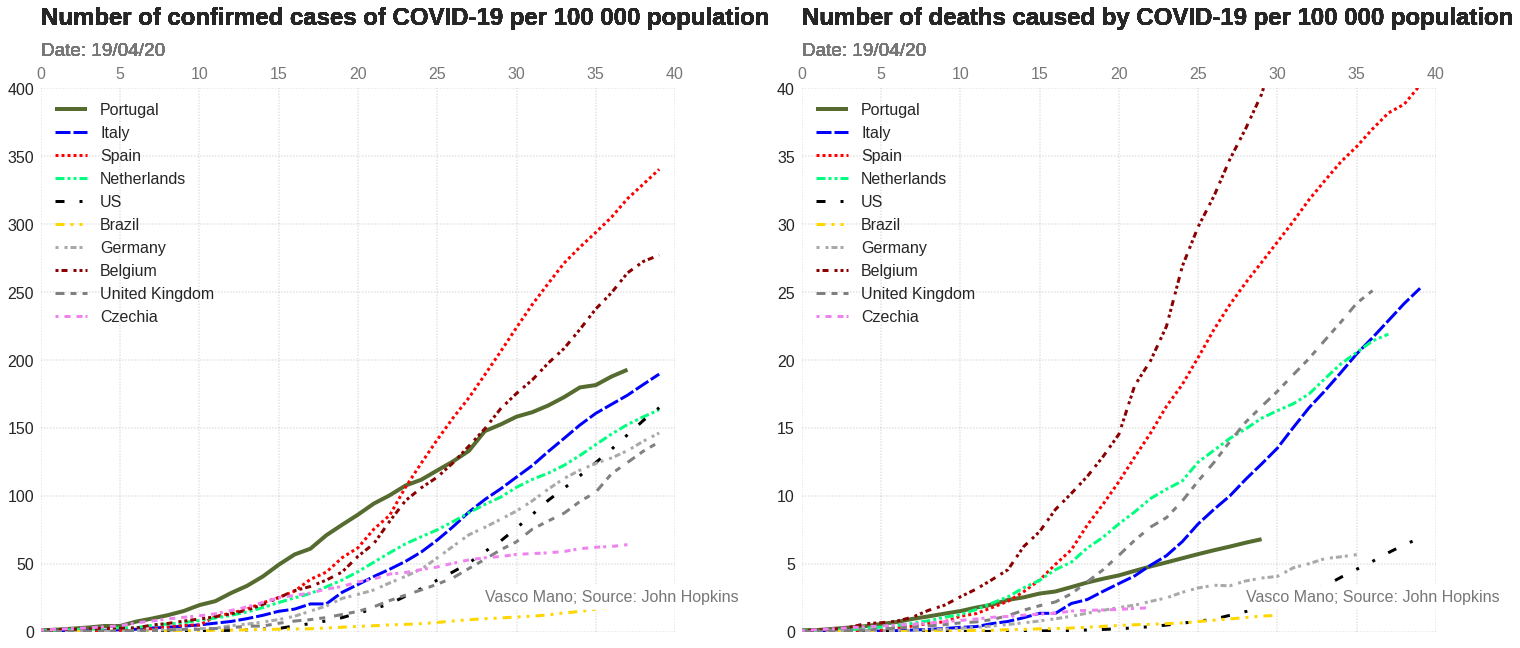

In [21]:
#hide_input
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

#plt.subplot(1, 2, 1)
frames(40, ax1, CASE=1, graph_type=2)

#plt.subplot(1, 2, 2)
frames(40, ax2, CASE=2, graph_type=2)

#plt.tight_layout()


## Number of confirmed cases and deaths - Log scale

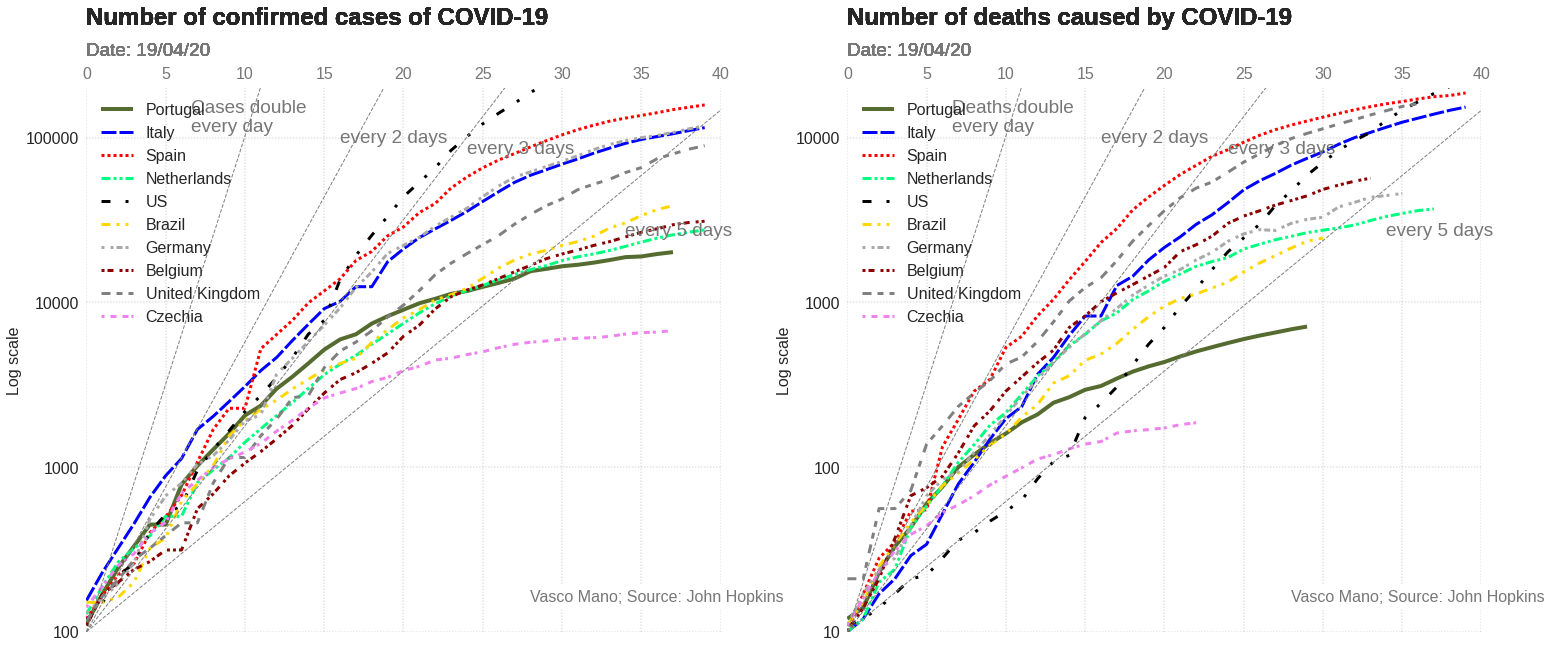

In [22]:
#hide_input
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

#plt.subplot(1, 2, 1)
frames(40, ax1, CASE=1, graph_type=3)

#plt.subplot(1, 2, 2)
frames(40, ax2, CASE=2, graph_type=3)

#plt.tight_layout()

## Number of confirmed cases and deaths per 100 000 population - Log scale

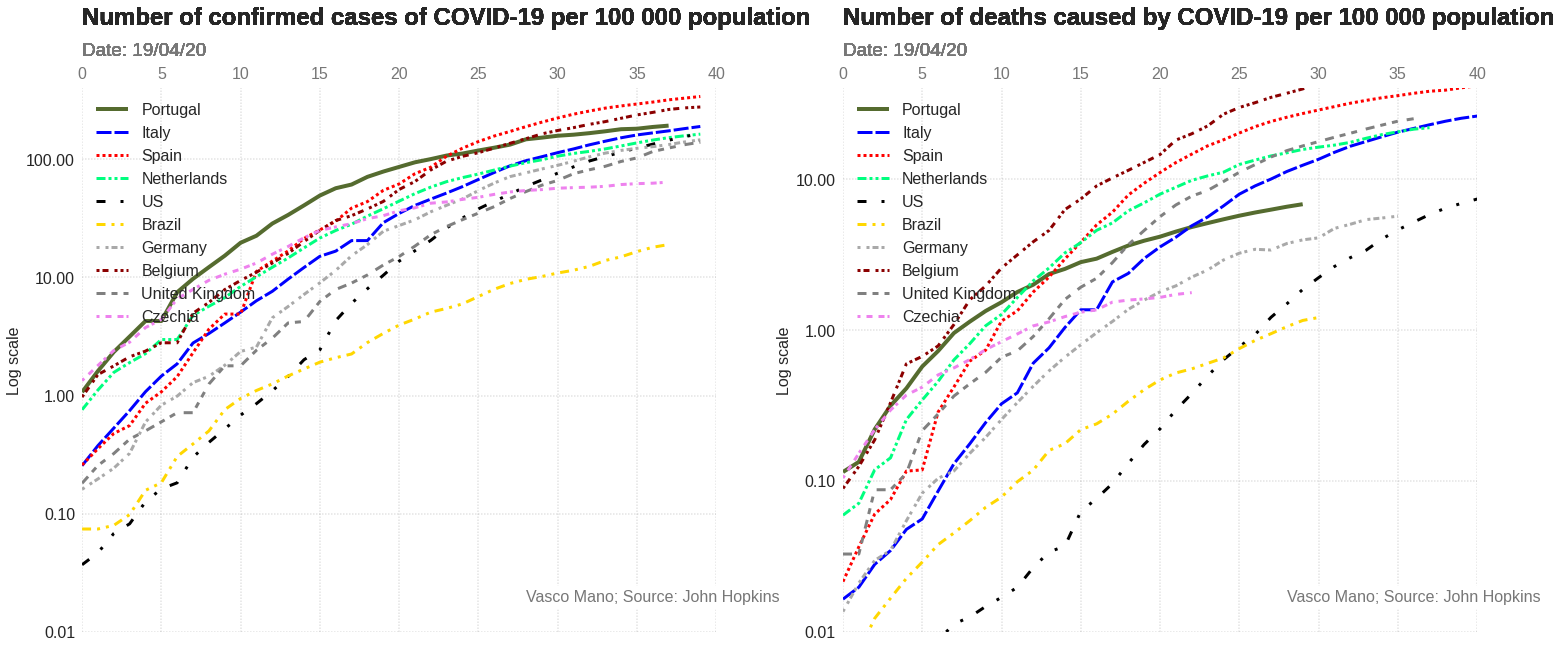

In [23]:
#hide_input
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

#plt.subplot(1, 2, 1)
frames(40, ax1, CASE=1, graph_type=4)

#plt.subplot(1, 2, 2)
frames(50, ax2, CASE=2, graph_type=4)

#plt.tight_layout()

## Number of daily confirmed cases and Number of daily confirmed per 100 000 population

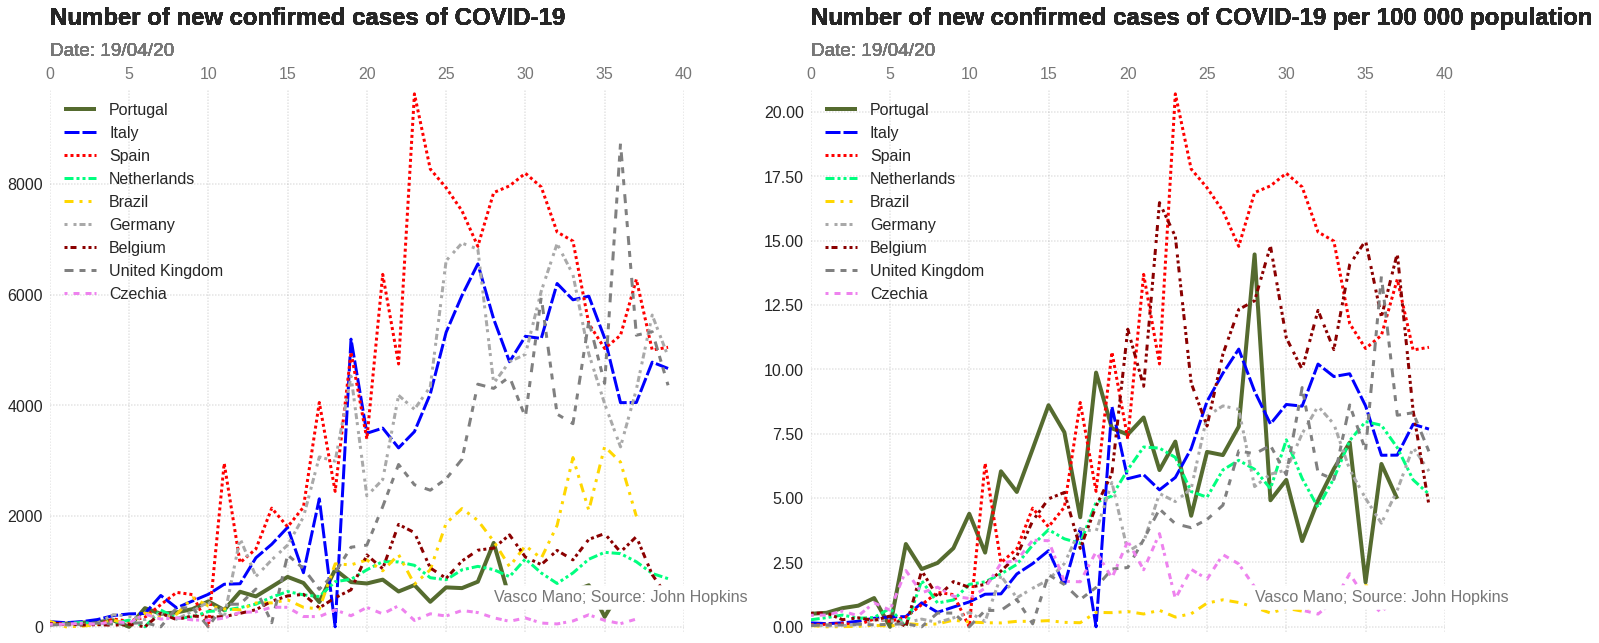

In [24]:
#hide_input
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

#plt.subplot(1, 2, 1)
frames(40, ax1, CASE=4, graph_type=1)

#plt.subplot(1, 2, 2)
frames(40, ax2, CASE=4, graph_type=2)

#plt.tight_layout()